In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 
import pickle
# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print(os.listdir("data/"))

['application_test.csv', 'application_train.csv', 'bureau.csv', 'bureau_balance.csv', 'credit_card_balance.csv', 'HomeCredit_columns_description.csv', 'installments_payments.csv', 'POS_CASH_balance.csv', 'previous_application.csv', 'sample_submission.csv']


In [3]:
# Training data
app_train = pd.read_csv('data/application_train.csv')
print('Training data shape: ', app_train.shape)
app_train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# Test data
app_test = pd.read_csv('data/application_test.csv')
print('Test data shape: ', app_test.shape)
app_test.head()

Test data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# EDA

## 1) Skewness of data

In [5]:
# Target column examination. Hows the distribution?
app_train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

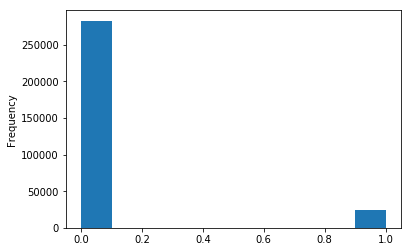

In [6]:
app_train['TARGET'].plot.hist()
plt.show()

In [7]:
# Highly skewed dataset

## 2) NA's in data

In [8]:
# Status of all columns
nas_all_cols = app_train.isna().sum()
print(nas_all_cols)

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
OWN_CAR_AGE                   202929
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
F

In [9]:
print('Columns, their NA counts, and percentage of missing data:')
na_cols = 0
for i in nas_all_cols.iteritems():
    if i[1] != 0:
        na_cols += 1
        print(i, (i[1]*100/307511))
print('Total number of columns with NA values in them: %d'%na_cols)

Columns, their NA counts, and percentage of missing data:
('AMT_ANNUITY', 12) 0.0039022994299390914
('AMT_GOODS_PRICE', 278) 0.09040327012692229
('NAME_TYPE_SUITE', 1292) 0.42014757195677555
('OWN_CAR_AGE', 202929) 65.9908100848425
('OCCUPATION_TYPE', 96391) 31.345545362604916
('CNT_FAM_MEMBERS', 2) 0.000650383238323182
('EXT_SOURCE_1', 173378) 56.38107254699832
('EXT_SOURCE_2', 660) 0.21462646864665003
('EXT_SOURCE_3', 60965) 19.825307062186393
('APARTMENTS_AVG', 156061) 50.749729277977046
('BASEMENTAREA_AVG', 179943) 58.515955526794166
('YEARS_BEGINEXPLUATATION_AVG', 150007) 48.781019215572776
('YEARS_BUILD_AVG', 204488) 66.49778381911541
('COMMONAREA_AVG', 214865) 69.87229725115525
('ELEVATORS_AVG', 163891) 53.29597965601231
('ENTRANCES_AVG', 154828) 50.34876801155081
('FLOORSMAX_AVG', 153020) 49.76082156410665
('FLOORSMIN_AVG', 208642) 67.84862980511267
('LANDAREA_AVG', 182590) 59.376737742714894
('LIVINGAPARTMENTS_AVG', 210199) 68.35495315614726
('LIVINGAREA_AVG', 154350) 50.19332

## Column types for continuous and categorical data

In [10]:
app_train.dtypes.value_counts()   #object types are categorical

float64    65
int64      41
object     16
dtype: int64

In [11]:
# Number of unique entries in each object type
app_train.select_dtypes('object').apply(pd.Series.nunique)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [12]:
# Label encode any variable with 2 unique entries, one hot encode variables with more entries

In [13]:
le_object = LabelEncoder()
le_count = 0

for c in app_train:
    if app_train[c].dtype == 'O' and (len(app_train[c].unique())) <= 2:
        app_train[c] = le_object.fit_transform(app_train[c])
        app_test[c] = le_object.fit_transform(app_test[c])
        le_count += 1
print('%d columns were Label Encoded.'%le_count)

3 columns were Label Encoded.


In [14]:
# One hot encode the remaining categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training set shape:', app_train.shape)
print('Test set shape:', app_test.shape)

Training set shape: (307511, 243)
Test set shape: (48744, 239)


Need to align data. Training data has some extra columns as features because the categorical variables had certain 
representations that were not present in the test dataset. So we remove those features from the test dataset by aligning.
Make sure to retain the TARGET column in training data since its not there in TEST dataset.

In [15]:
train_target_col = app_train['TARGET']

app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)
app_train['TARGET'] = train_target_col

In [16]:
print(app_train.shape, app_test.shape)

(307511, 240) (48744, 239)


# Anomalies

In [17]:
# Lets explore days birth column

### Days birth

In [18]:
app_train['DAYS_BIRTH'].describe()   #Values are in negative, measured from day of loan application

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

In [19]:
(app_train['DAYS_BIRTH']/-365).describe()    # /-365 for age in years

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [20]:
# No outliers for age

### Days employment

In [21]:
app_train['DAYS_EMPLOYED'].describe()   # Weird, ranges from -ve to +ve and max val is 1000 years

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

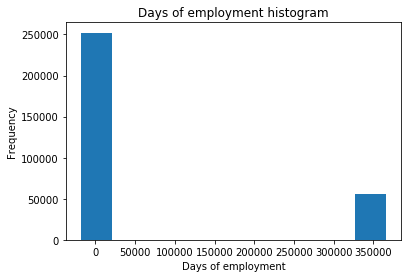

In [22]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days of employment histogram')
plt.xlabel('Days of employment')
plt.show()

In [23]:
np.sum(app_train['DAYS_EMPLOYED'] == 365243)    #It seems like all the anomalies have the same value

55374

In [24]:
app_train['TARGET'].mean()

0.08072881945686496

In [25]:
# How are their loan default stats compared to non anomolous people?
anoms = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anoms = app_train[app_train['DAYS_EMPLOYED'] != 365243]

print('Anomalies default on %0.2f%% of loans' %(100*anoms['TARGET'].mean()))
print('Non anomalies default on %0.2f%% of loans' %(100*non_anoms['TARGET'].mean()))

Anomalies default on 5.40% of loans
Non anomalies default on 8.66% of loans


Anomalies have a lower rate of default. Lets fill all anomalies with Nan and create a flag column for anomalies in both test and train. Also keep in mind since all anomalies have the same value, there must be some significance to it. So let all be Nan for now so that when we impute it takes the same values.

In [26]:
app_train['DAYS_EMPLOYED_ANOM'] = app_train['DAYS_EMPLOYED'] == 365243          # Create flag column
app_test['DAYS_EMPLOYED_ANOM'] = app_test['DAYS_EMPLOYED'] == 365243

In [27]:
app_train['DAYS_EMPLOYED'].replace(to_replace = 365243, value = np.nan, inplace = True)   # Replace anomalies with Nan

app_test['DAYS_EMPLOYED'].replace(to_replace = 365243, value = np.nan, inplace = True)

Th employment days distribution should seem more normal now.

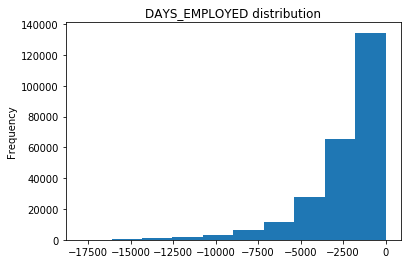

In [28]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'DAYS_EMPLOYED distribution')
plt.show()

In [29]:
# Just check how many anomalies are present in the test dataset.
print('%d anomalies in the test dataset i.e %0.2f%% anomalies in the test dataset.' \
      %(app_test['DAYS_EMPLOYED_ANOM'].sum(), 100*app_test['DAYS_EMPLOYED_ANOM'].mean()))

9274 anomalies in the test dataset i.e 19.03% anomalies in the test dataset.


# Correlations

In [30]:
# Lets look at correlations of all features with target variable in sorted order
from time import time

In [31]:
c_start = time()
train_corr = app_train.corr()['TARGET'].sort_values()
print('Time taken: %0.2f' %(time() - c_start))

Time taken: 112.81


In [32]:
print('Top 15 correlations: \n', train_corr.tail(15))
print('Lowest 15 correlations: \n', train_corr.head(15))

Top 15 correlations: 
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64
Lowest 15 correlat

Correlation with age (DAYS_BIRTH) is highest besided TARGET itself. But age is negative in the data, so the correlation is actually negative so as age increases, people get older, they are less likely to default i.e hit target of 1 they are more likely to hit target 0.  

### Explore effect of age on repayment

In [33]:
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])      # Get all age to positive

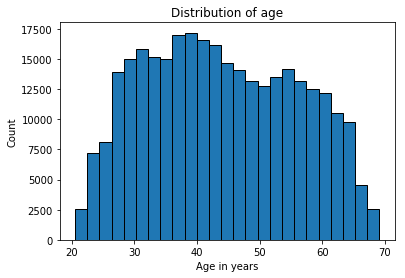

In [34]:
plt.hist(app_train['DAYS_BIRTH']/ 365, bins = 25, edgecolor = 'k')
plt.title('Distribution of age')
plt.xlabel('Age in years')
plt.ylabel('Count')
plt.show()

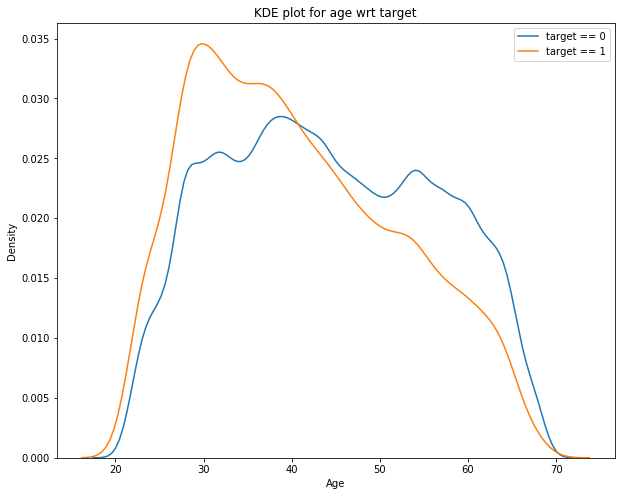

In [35]:
# plot KDE for age and look at how it varies wrt the target
plt.figure(figsize = (10,8))

sns.kdeplot(app_train[app_train['TARGET'] == 0]['DAYS_BIRTH']/365, label = 'target == 0')
sns.kdeplot(app_train[app_train['TARGET'] == 1]['DAYS_BIRTH']/365, label = 'target == 1')
plt.title('KDE plot for age wrt target')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

In [36]:
age_target = app_train[['DAYS_BIRTH', 'TARGET']]
age_target['DAYS_BIRTH'] = age_target['DAYS_BIRTH']/365

In [37]:
age_target['bin'] = pd.cut(age_target['DAYS_BIRTH'], bins = np.linspace(20,70, num = 11))

In [38]:
group_means = age_target.groupby('bin').mean()

In [39]:
group_means

,DAYS_BIRTH,TARGET
bin,,
"(20.0, 25.0]",23.377522,0.123036
"(25.0, 30.0]",27.822518,0.111436
"(30.0, 35.0]",32.479037,0.102814
"(35.0, 40.0]",37.555913,0.089414
"(40.0, 45.0]",42.459346,0.078491
"(45.0, 50.0]",47.462741,0.074171
"(50.0, 55.0]",52.593136,0.066968
"(55.0, 60.0]",57.491131,0.055314
"(60.0, 65.0]",62.412459,0.052737


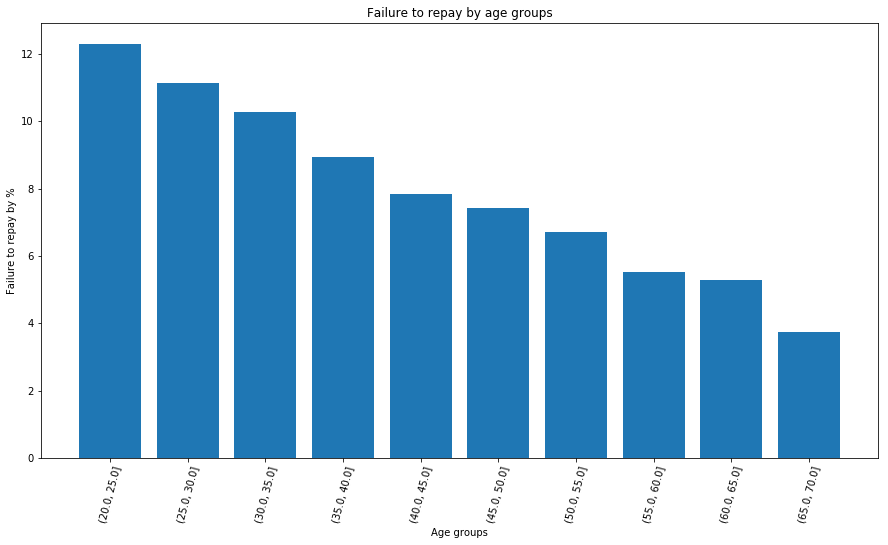

In [40]:
plt.figure(figsize = (15,8))
plt.bar(group_means.index.astype(str), 100 * group_means['TARGET'])
plt.title('Failure to repay by age groups')
plt.xticks(rotation = 75)
plt.xlabel('Age groups')
plt.ylabel('Failure to repay by %')
plt.show()

### Exterior sources

In [41]:
# Show correlations betweeen external sources. Strongest -ve correlations were ext1,2,3.

In [42]:
ext_sources = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
ext_sources_corr = ext_sources.corr()
print(ext_sources_corr['TARGET'])

EXT_SOURCE_1   -0.155317
EXT_SOURCE_2   -0.160472
EXT_SOURCE_3   -0.178919
DAYS_BIRTH     -0.078239
TARGET          1.000000
Name: TARGET, dtype: float64


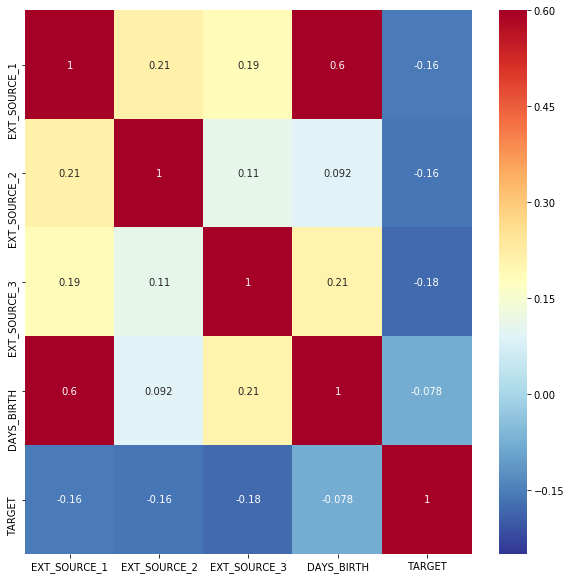

In [43]:
plt.figure(figsize = (10,10))
sns.heatmap(ext_sources_corr, cmap = plt.cm.RdYlBu_r, annot = True, vmin = -0.25, vmax = 0.6)

In [44]:
# Plot KDEs for each ext source

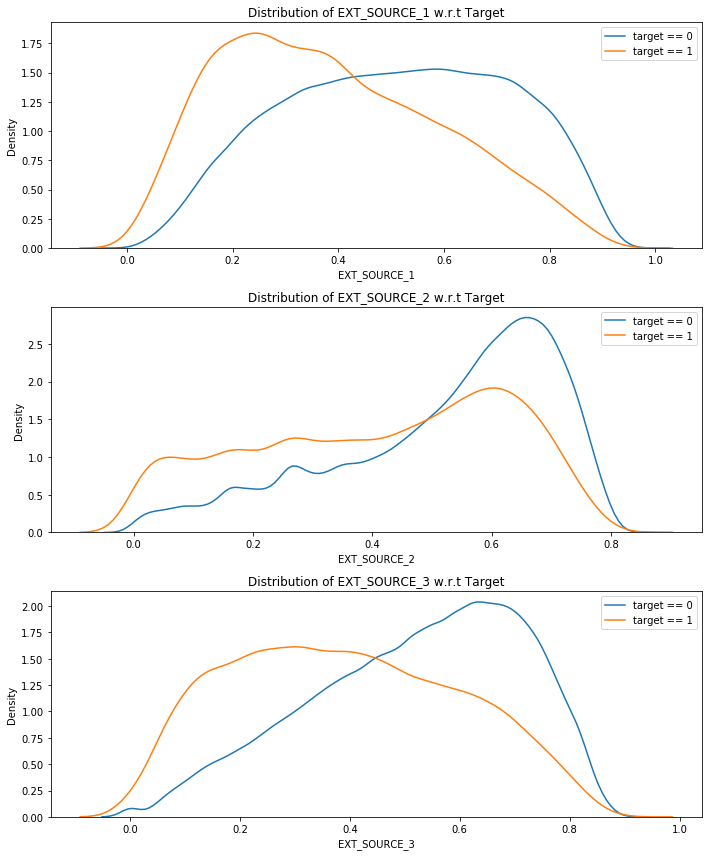

In [45]:
plt.figure(figsize=(10,12))
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i+1)
    plt.title('Distribution of %s w.r.t Target' %source)
    sns.kdeplot(ext_sources[ext_sources['TARGET'] == 0][source], label = 'target == 0')
    sns.kdeplot(ext_sources[ext_sources['TARGET'] == 1][source], label = 'target == 1')
    plt.xlabel(source); plt.ylabel('Density')
plt.tight_layout()

Text(0.5,1.05,'Ext Source and Age Features Pairs Plot')

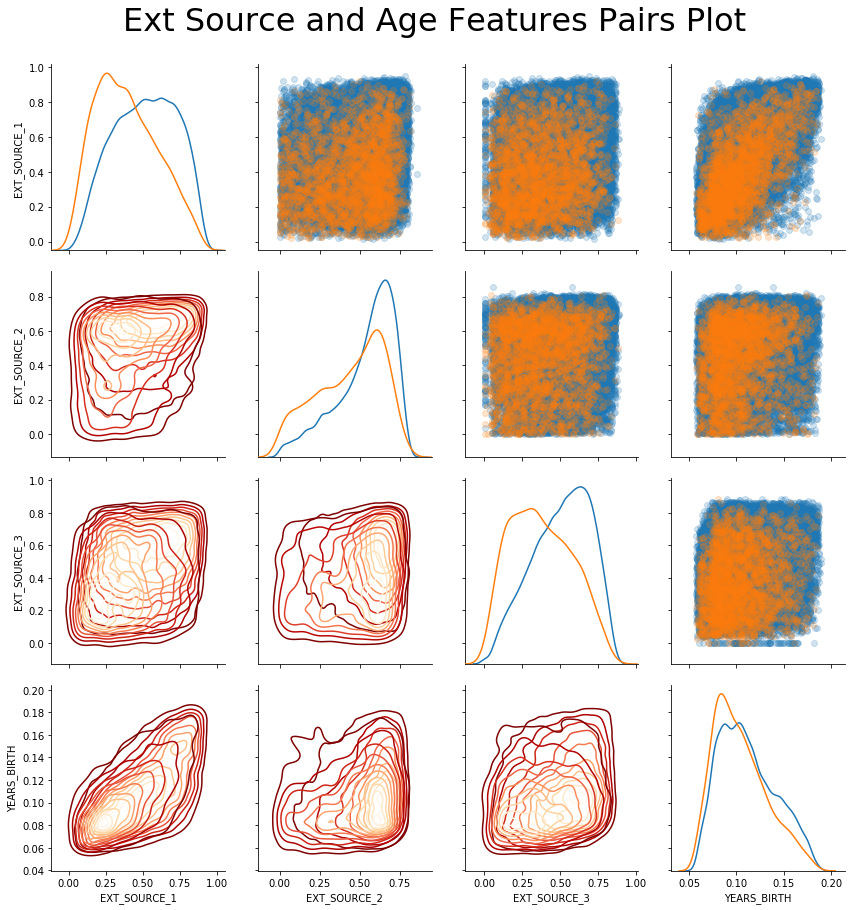

In [46]:
# Grid object as suggested by https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction
age_target['YEARS_BIRTH'] = age_target['DAYS_BIRTH']/365
# Copy the data for plotting
plot_data = ext_sources.drop(columns = ['DAYS_BIRTH']).copy()

# Add in the age of the client in years
plot_data['YEARS_BIRTH'] = age_target['YEARS_BIRTH']

# Drop na values and limit to first 100000 rows
plot_data = plot_data.dropna().loc[:100000, :]

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05)

### Explore other features (financial indicators)

In [47]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

In [48]:
app_train_domain['DAYS_EMPLOYED_PERC'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
# Days employed as a proportion of age

app_train_domain['CREDIT_INCOME_PERC'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
# Total income as a proportion of credit amount of loan

app_train_domain['INCOME_PER_PERSON'] = app_train_domain['AMT_INCOME_TOTAL'] / app_train_domain['CNT_FAM_MEMBERS']
# Income per family member (indicates dependancies in the house)

app_train_domain['ANNUITY_INCOME_PERC'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
# Loan annuity is the amount the person has to repay at regular intervals, as a proportion of total income

app_train_domain['PAYMENT_RATE'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
# Repayment rate (amount to repay as a proportion of loan credit)

In [49]:
app_test_domain['DAYS_EMPLOYED_PERC'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']
# Days employed as a proportion of age

app_test_domain['CREDIT_INCOME_PERC'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
# Total income as a proportion of credit amount of loan

app_test_domain['INCOME_PER_PERSON'] = app_test_domain['AMT_INCOME_TOTAL'] / app_test_domain['CNT_FAM_MEMBERS']
# Income per family member (indicates dependancies in the house)

app_test_domain['ANNUITY_INCOME_PERC'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
# Loan annuity is the amount the person has to repay at regular intervals, as a proportion of total income

app_test_domain['PAYMENT_RATE'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
# Repayment rate (amount to repay as a proportion of loan credit)

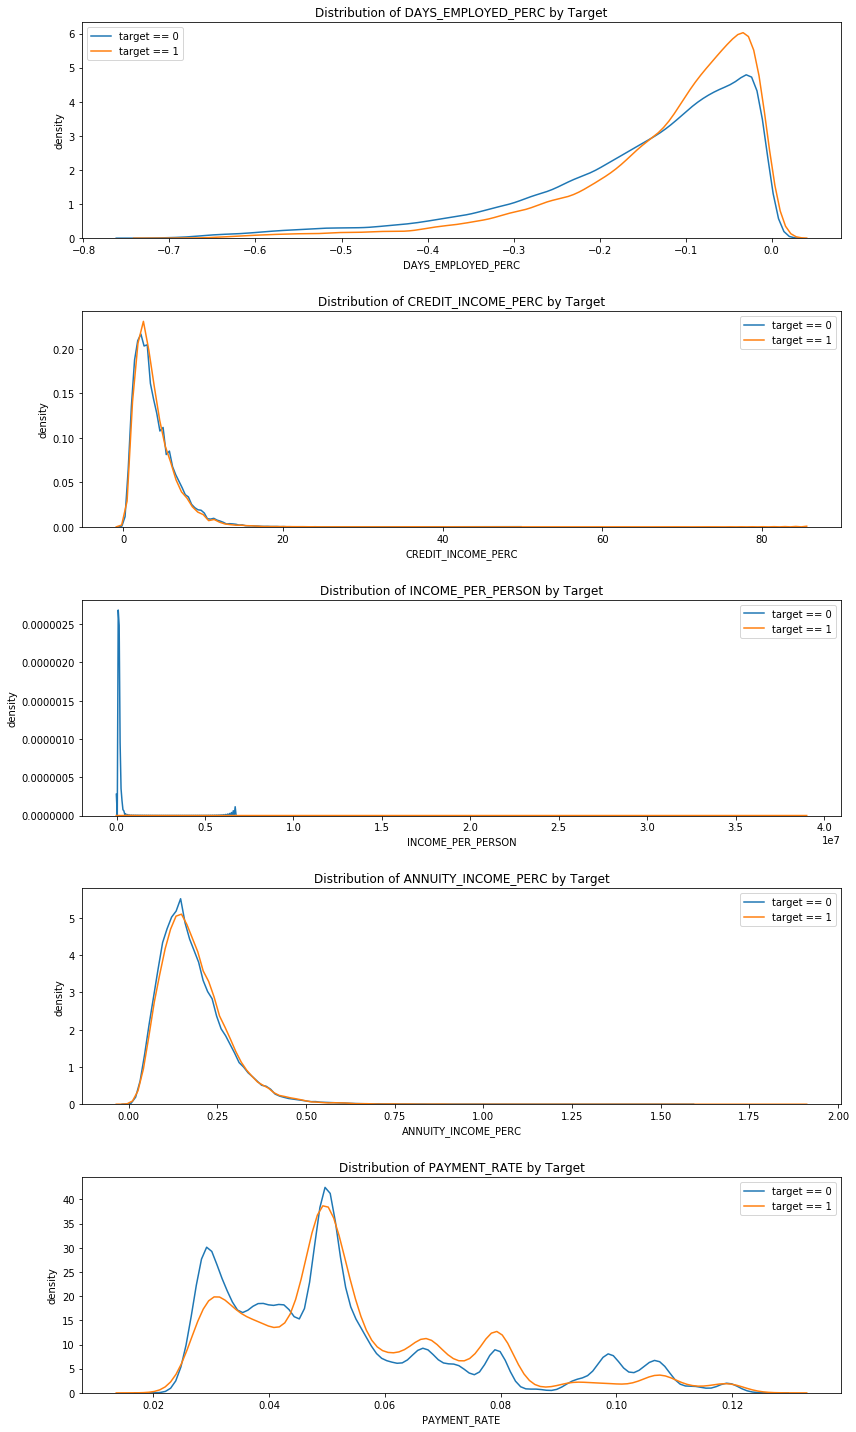

In [50]:
# Visualise new features with kde plots
plt.figure(figsize=(12, 20))

for i, feature in enumerate(['DAYS_EMPLOYED_PERC', 'CREDIT_INCOME_PERC', 'INCOME_PER_PERSON', 'ANNUITY_INCOME_PERC', 'PAYMENT_RATE']):
    plt.subplot(5, 1, i+1)
    
    sns.kdeplot(app_train_domain[feature][app_train_domain['TARGET'] == 0], label = 'target == 0')
    
    sns.kdeplot(app_train_domain[feature][app_train_domain['TARGET'] == 1], label = 'target == 1')
    plt.title('Distribution of %s by Target' %feature)
    plt.xlabel(feature)
    plt.ylabel('density')
plt.tight_layout(h_pad = 2.5)

### Generate polynomial features and check correlation

In [51]:
# Create a new df of features we need, impute na values with median, and then get polynomial features

In [52]:
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

In [53]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

In [54]:
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_features_test)

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly_gen = PolynomialFeatures(degree=3)

In [56]:
poly_gen.fit(poly_features)

poly_features = poly_gen.transform(poly_features)
poly_features_test = poly_gen.transform(poly_features_test)
print('New train features shape is:', poly_features.shape)

New train features shape is: (307511, 35)


In [77]:
print('New test features shape is:', poly_features_test.shape)

New test features shape is: (48744, 35)


In [57]:
# View polynomial feature names

In [58]:
poly_gen.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2',
 'EXT_SOURCE_1^3',
 'EXT_SOURCE_1^2 EXT_SOURCE_2',
 'EXT_SOURCE_1^2 EXT_SOURCE_3',
 'EXT_SOURCE_1^2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_2^2',
 'EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_1 EXT_SOURCE_3^2',
 'EXT_SOURCE_1 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_1 DAYS_BIRTH^2',
 'EXT_SOURCE_2^3',
 'EXT_SOURCE_2^2 EXT_SOURCE_3',
 'EXT_SOURCE_2^2 DAYS_BIRTH',
 'EXT_SOURCE_2 EXT_SOURCE_3^2',
 'EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH',
 'EXT_SOURCE_2 DAYS_BIRTH^2',
 'EXT_SOURCE_3^3',
 'EXT_SOURCE_3^2 DAYS_BIRTH',
 'EXT_SOURCE_3 DAYS_BIRTH^2',
 'DAYS_BIRTH^3']

In [59]:
# Convert it to a DF
poly_features = pd.DataFrame(poly_features, columns=poly_gen.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2'\
                                                                                                 , 'EXT_SOURCE_3', 'DAYS_BIRTH']))
poly_features['TARGET'] = poly_target

In [84]:
# Same with test 
poly_features_test = pd.DataFrame(poly_features_test, columns=poly_gen.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2'\
                                                                                                 , 'EXT_SOURCE_3', 'DAYS_BIRTH']))


In [60]:
poly_corrs = poly_features.corr()['TARGET'].sort_values()

In [61]:
print('Top 10 most negative correlated features:')
print(poly_corrs.head(10))
print('Top 5 most positive correlated features:')
print(poly_corrs.tail(5))

Top 10 most negative correlated features:
EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
Top 5 most positive correlated features:
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [62]:
app_train.shape

(307511, 241)

In [63]:
# Merge polynomial features into the original train dataset.

In [67]:
poly_features = poly_features.drop(columns = ['TARGET'])

In [69]:
poly_features['SK_ID_CURR'] = app_train['SK_ID_CURR']

In [70]:
app_train_poly = app_train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

In [91]:
[j for j in app_train_poly.columns]

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH_x',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'OWN_CAR_AGE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_1_x',
 'EXT_SOURCE_2_x',
 'EXT_SOURCE_3_x',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG

In [76]:
poly_features.shape

(307511, 36)

In [85]:
# Same for test
poly_features_test['SK_ID_CURR'] = app_test['SK_ID_CURR']
app_test_poly = app_test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

In [88]:
app_test_poly.shape

(48744, 275)

In [92]:
# Save these to disk
fname_1 = 'app_train_poly'
fobject_1 = open(fname_1, 'wb')
pickle.dump(app_train_poly, fobject_1)
fobject_1.close()

In [93]:
# Save these to disk
fname_2 = 'app_test_poly'
fobject_2 = open(fname_2, 'wb')
pickle.dump(app_test_poly, fobject_2)
fobject_2.close()